In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

In [45]:
PATH_TO_DATA = 'data/predict_future_sales'
sales_train = pd.read_pickle('data/sales_train_fe.pkl')

#### Lets have a look at the yearly performance

In [46]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,month,day,is_holiday,item_category_id
49800,2013-01-01,0,18,5823,2500.0,1.0,2013,1,1,1,35
29784,2013-01-01,0,27,5573,849.0,1.0,2013,1,1,1,2
35476,2013-01-01,0,7,1006,399.0,1.0,2013,1,1,1,67
8330,2013-01-01,0,19,17707,899.0,1.0,2013,1,1,1,19
57384,2013-01-01,0,14,19548,149.0,1.0,2013,1,1,1,40


In [30]:
sales_train_monthly = sales_train.groupby(['month','year'])[['item_cnt_day']].sum()
sales_train_monthly.reset_index(level=['month', 'year'],inplace=True)

In [44]:
sales_train_monthly.head()

,month,year,item_cnt_day
0,1,2013,131479.0
1,1,2014,116899.0
2,1,2015,110971.0
3,2,2013,128090.0
4,2,2014,109687.0


(array([6., 3., 5., 6., 4., 7., 1., 0., 1., 1.]),
 array([ 63187. ,  75202.5,  87218. ,  99233.5, 111249. , 123264.5,
        135280. , 147295.5, 159311. , 171326.5, 183342. ], dtype=float32),
 <a list of 10 Patch objects>)

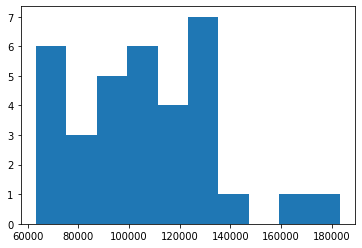

In [32]:
plt.hist(sales_train_monthly['item_cnt_day'])

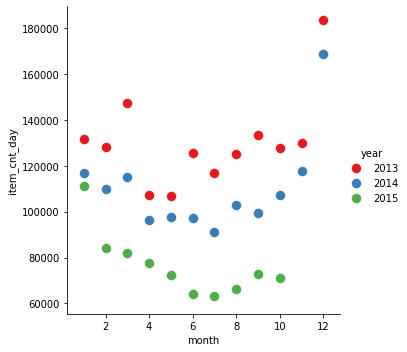

In [33]:
g = sns.FacetGrid(sales_train_monthly, hue="year", palette="Set1", height=5 )
g.map(plt.scatter, "month", "item_cnt_day", s=100, linewidth=.5, edgecolor="white")
g.add_legend();

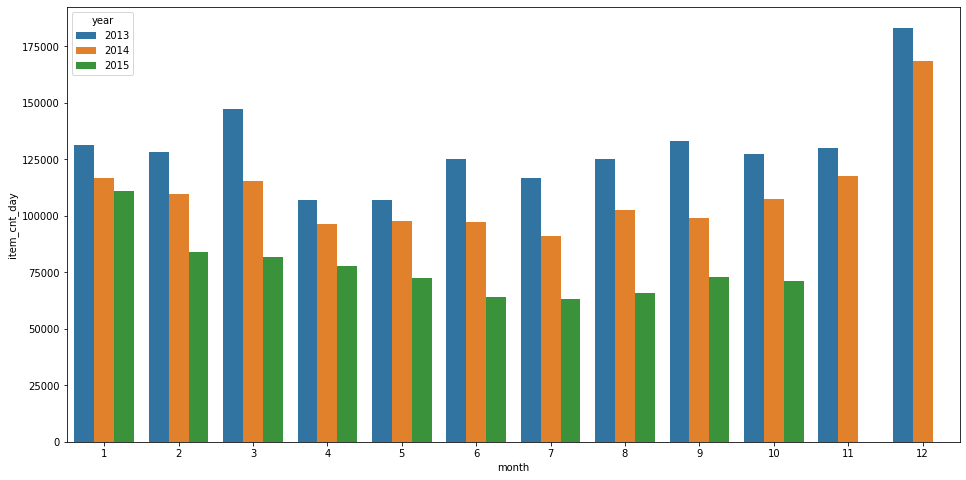

In [34]:
plt.figure(figsize=(16, 8))
sns.barplot(x="month", y="item_cnt_day", hue="year", data=sales_train_monthly)

#### As observed earlier, there is a negative trend on sales

### Lets look at the performance of the shops

In [39]:
shop_train = sales_train.groupby(['year','shop_id'])[['item_cnt_day']].sum()
shop_train.reset_index(level=['year','shop_id'],inplace=True)
shop_train.head()

,year,shop_id,item_cnt_day
0,2013,0,11705.0
1,2013,1,6311.0
2,2013,2,9961.0
3,2013,3,10199.0
4,2013,4,19002.0


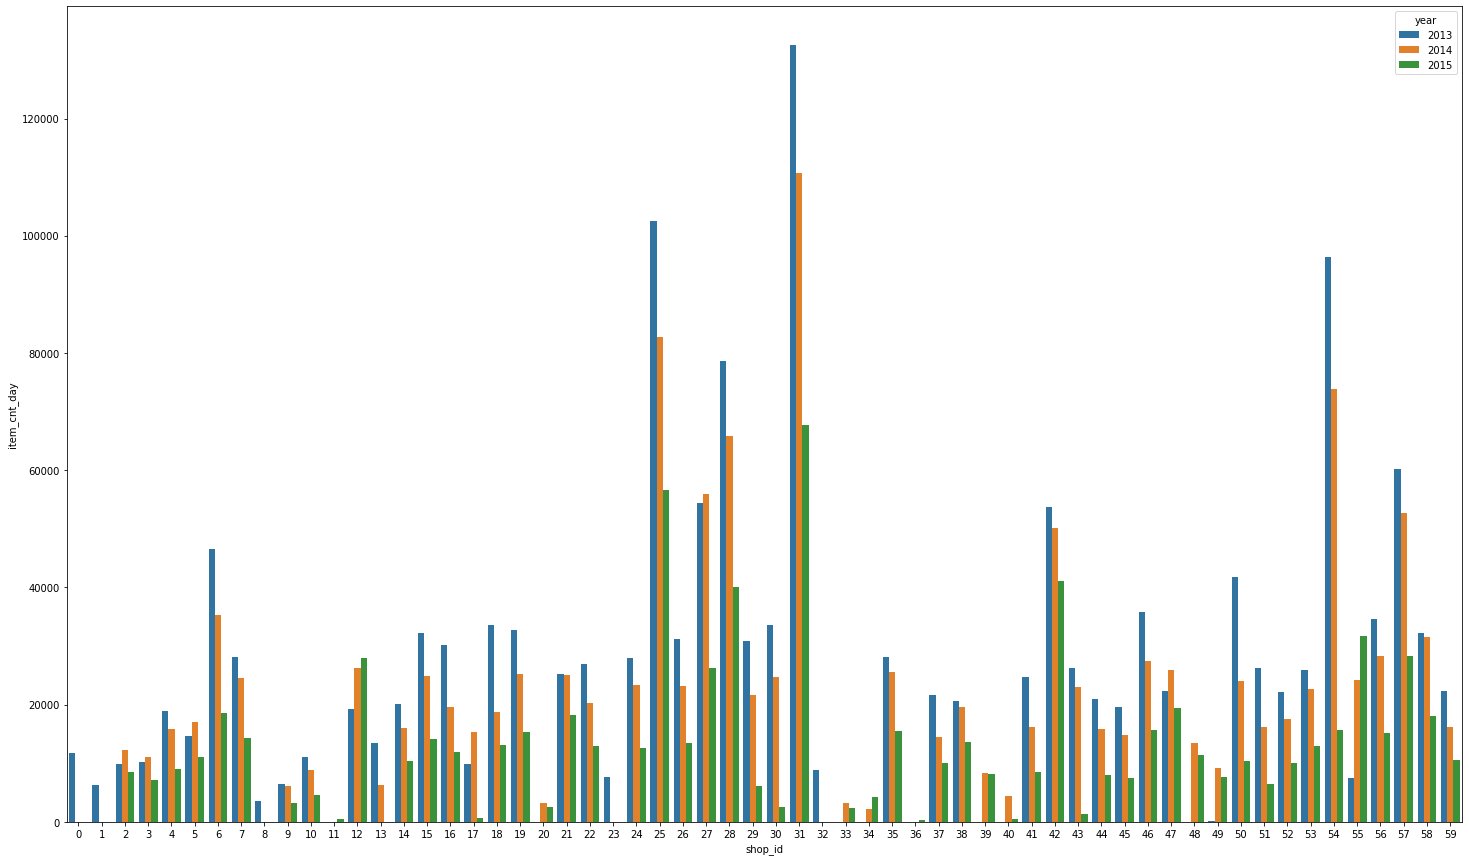

In [40]:
plt.figure(figsize=(25, 15))
sns.barplot(x="shop_id", y="item_cnt_day", hue="year", data=shop_train)

#### Some shops performed significantly better than others , esp 25,31,54

### Lets look at the item categories sold

In [47]:
item_cat_train = sales_train.groupby(['item_category_id','year'])[['item_cnt_day']].sum()
item_cat_train.reset_index(level=['item_category_id','year'],inplace=True)
item_cat_train.head()

,item_category_id,year,item_cnt_day
0,0,2013,3.0
1,1,2013,2.0
2,2,2013,11339.0
3,2,2014,6515.0
4,2,2015,1743.0


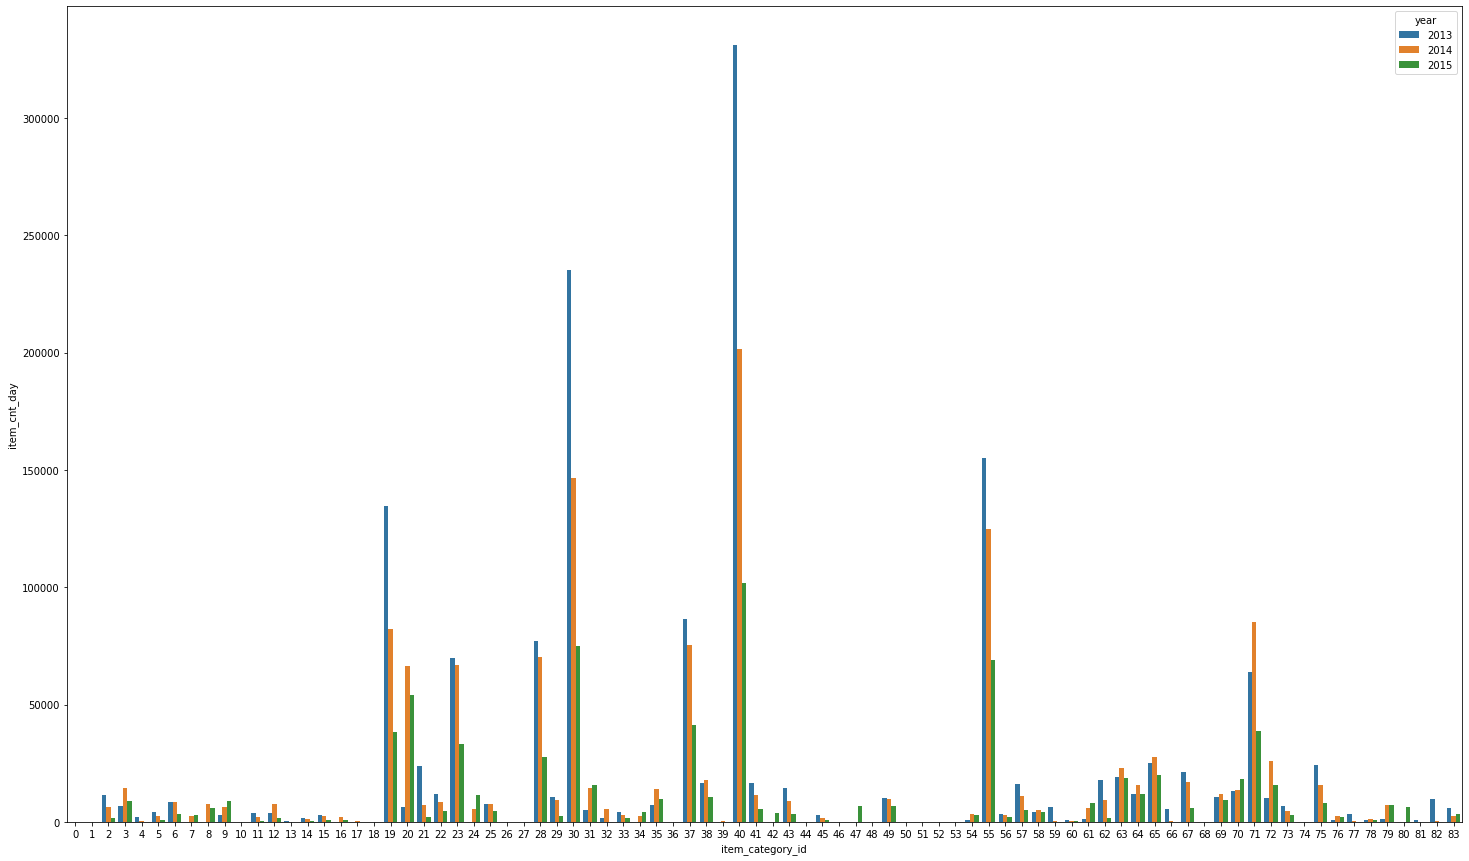

In [48]:
plt.figure(figsize=(25, 15))
sns.barplot(x="item_category_id", y="item_cnt_day", hue="year", data=item_cat_train)

#### Some categories clearly sold better than others , like 30,40,55

### Observations
- We see that the highest sales occurs in the month of december
- The reason for the decline of sales could be that year on year could be that these items could be electronic or software products , where a newer version was released and hence the older versions saw a decline
- The Item catalogue could also not have been updated, where as the items were removed from the shops and not available for sale
- Some shops perform better than the the rest combined. Could be its location in a High street or could the shops would have started or shut down(closed) in the given period
- Some item categories were clearly popular in sales